In [1]:
import os
import tensorflow as tf
from IPython.display import Image, display

import numpy as np
from PIL import Image

In [2]:
from src.train.unet import mean_percent_count_err

In [3]:
model_path = os.path.join(os.getcwd(), 'src', 'train', 'out', '20210713-160536__least_val_error.hdf5')
custom_objects = {"mean_percent_count_err": mean_percent_count_err}

In [4]:
images = [
    '25954208-monarch-butterfly-colony-in-mexico__768_256__r_90',
    '37244739-monarch-butterflies-from-canada-and-us-in-their-wintering-grounds-in-mexico__768_256__r_270',
    '16080161555_c3000e2f09_o__1792_512__r_270',
    'DSC_0061__0_2560__r_270',
    'DSC_0061__512_1536__'
]
input_dim = (512, 512)
output_dim = 512 * 512

x_img_path = os.path.join(os.getcwd(), 'dataset', 'preprocessed', '512_cropped', 'cropped_raw', images[-1] + '.jpg')
y_img_path = os.path.join(os.getcwd(), 'dataset', 'preprocessed', '512_cropped', 'density', images[-1] + '.tif')

x = np.empty(input_dim, dtype=float)

x_img = Image.open(x_img_path)
x = np.array(x_img) * (1./255)

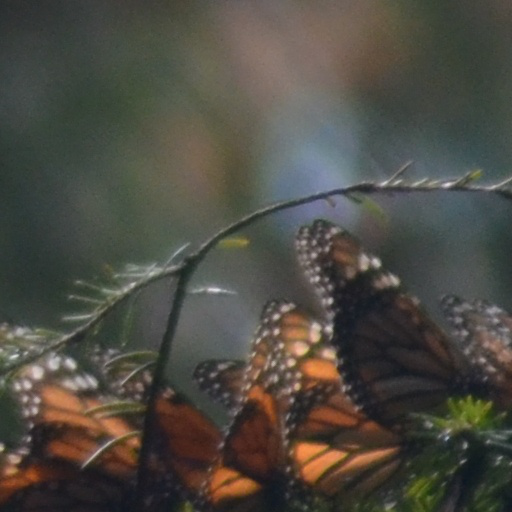

In [5]:
x_img

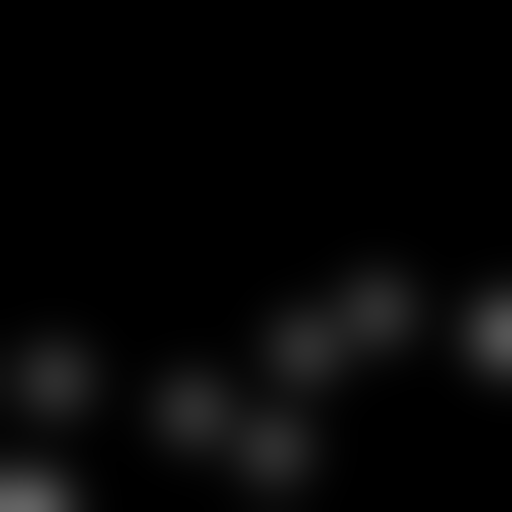

In [6]:
y = Image.open(y_img_path)
y_img_np = np.array(y)
y_img = Image.fromarray(np.uint8(y_img_np.reshape((*input_dim)) * 255), 'L')
y_img

In [7]:
yhat_img = None
yhat_img_orig = None 
with tf.keras.utils.custom_object_scope(custom_objects):
    cnn_model = tf.keras.models.load_model(model_path)
    
    yhat = cnn_model(x.reshape(1, *input_dim, 3), training=False)
    yhat_np = yhat.numpy()
    print("No. of Monarchs (predicted): {}".format(yhat_np.sum()/1000))
    
    yhat_np_reshaped = yhat_np.reshape((*input_dim))
    
    yhat_img = Image.fromarray(np.uint8(yhat_np_reshaped * 255), 'L')
    yhat_img_orig = Image.fromarray(yhat_np_reshaped, 'F')

No. of Monarchs (predicted): 3.664799072265625


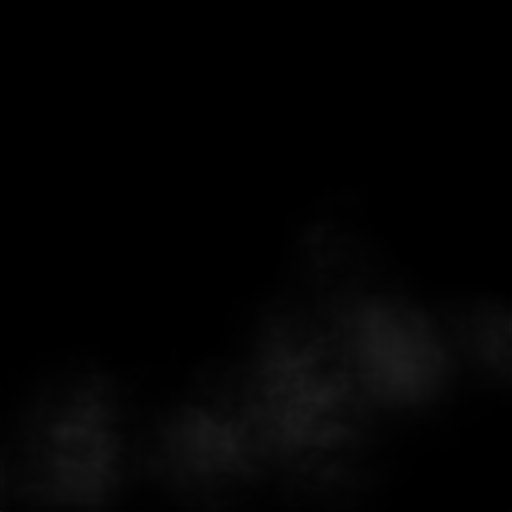

In [8]:
yhat_img

In [9]:
yhat_img.save(fp='test_jpg.jpg')

In [10]:
yhat_img_orig.save(fp='test_tif.tif')

# Compress data

In [11]:
test_img_path = os.path.join(os.getcwd(), 'dataset', 'preprocessed', '1024_cropped', 'density', 'e867fd2ce1495951719e7735577a19b9__256_0__r_180.tif')
test_img = Image.open(test_img_path)
input_dim_1024 = (1024, 1024)

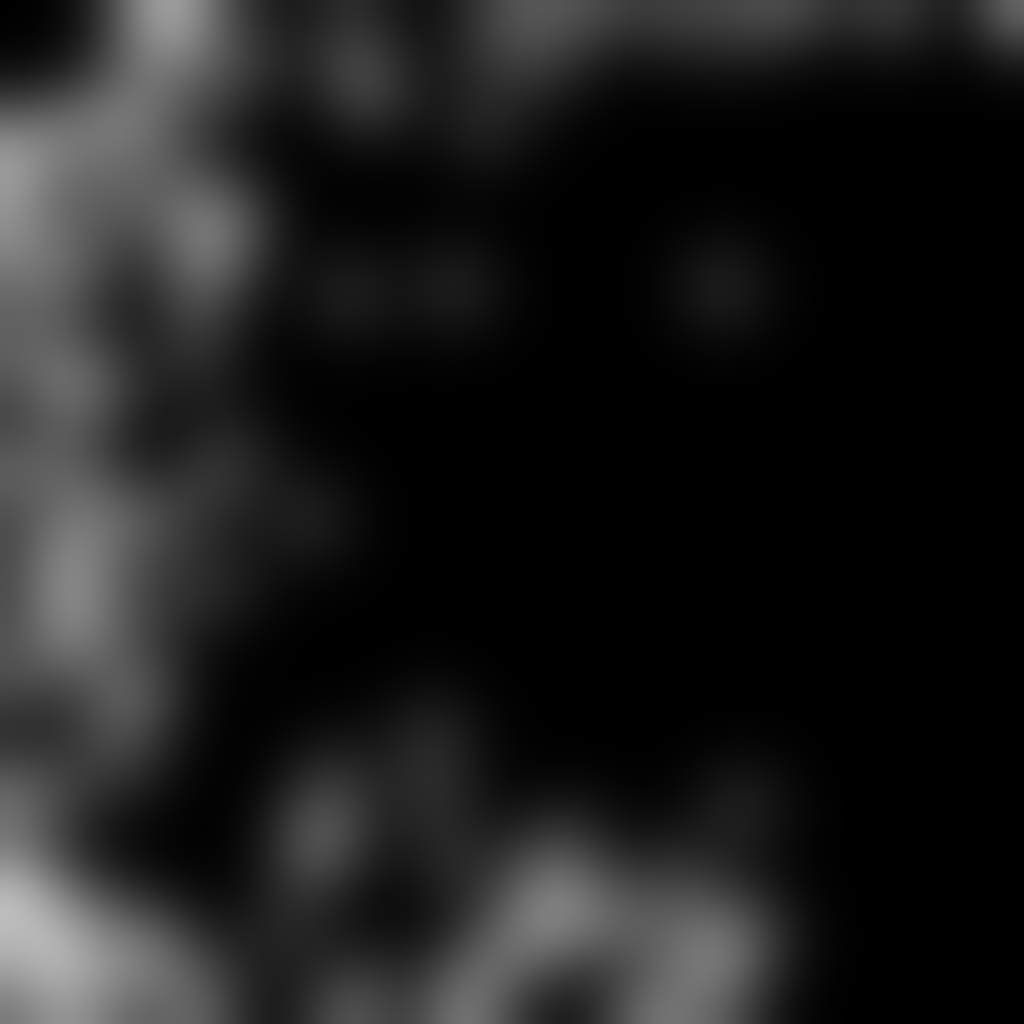

In [12]:
test_img_np = np.array(test_img)
test_img_reconstructed = Image.fromarray(np.uint8(test_img_np.reshape((*input_dim_1024)) * 255), 'L')
test_img_reconstructed

In [13]:
input_dim_512 = (512, 512)
test_img_compressed = test_img.resize(input_dim_512)

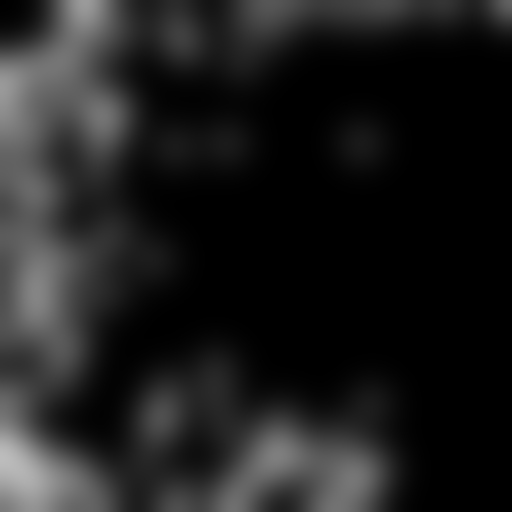

In [14]:
test_img_comp_np = np.array(test_img_compressed)
test_img_comp_reconstructed = Image.fromarray(np.uint8(test_img_comp_np.reshape((*input_dim_512)) * 255), 'L')
test_img_comp_reconstructed

In [15]:
test_img_np.sum() / 1000

128.0

In [16]:
test_img_np.max()

0.74035895

In [17]:
(test_img_comp_np.sum() * 4) / 1000

128.000015625

In [18]:
test_img_comp_np.max()

0.7403463

In [19]:
input_dim_800 = (800, 800)
test_img_compressed_2 = test_img.resize(input_dim_800)

In [20]:
test_img_compressed_2_np = np.array(test_img_compressed_2)
(test_img_compressed_2_np.sum() * ((1024.0/800.0)**2)) / 1000

128.00002560000001

In [32]:
test_img_3_path = os.path.join(os.getcwd(), 'dataset', 'preprocessed', '1024_cropped', 'bw_dots', 'sized_Mexico-Monarch-Astrid-Frisch.png')
test_img_3 = Image.open(test_img_3_path)
test_img_3_np = np.array(test_img_3)
print(test_img_3_np.sum() / 255)

155.0


# Scratchpad

In [22]:
INPUT_IMAGES_PATH = os.path.join(os.getcwd(), 'dataset', 'preprocessed', '1024_cropped', 'cropped_raw')
images = [f for f in os.listdir(INPUT_IMAGES_PATH) if os.path.isfile(f)]

In [23]:
images

[]